 # American Sign Language (ASL)

American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals. The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures
A lot of recent progress has been made towards developing computer vision systems that translate sign language to spoken language. This technology often relies on complex neural network architectures that can detect subtle patterns in streaming video. However, as a first step, towards understanding how to build a translation system, we can reduce the size of the problem by translating individual letters, instead of sentences.

In this notebook, we will train a convolutional neural network to classify images of American Sign Language (ASL) letters. After loading, examining, and preprocessing the data, we will train the network and test its performance.

In the code cell below, we load the training and test data.

x_train and x_test are arrays of image data with shape (num_samples, 3, 50, 50), corresponding to the training and test datasets, respectively.
y_train and y_test are arrays of category labels with shape (num_samples,), corresponding to the training and test datasets, respectively.

In [7]:
# Import packages and set numpy random seed
import numpy as np
np.random.seed(5) 
import tensorflow as tf
# tf.set_random_seed(2)
from datasets import sign_language
import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = sign_language.load_data()

## Visualize the training data
visualize the first several images in the training data, along with their corresponding labels.

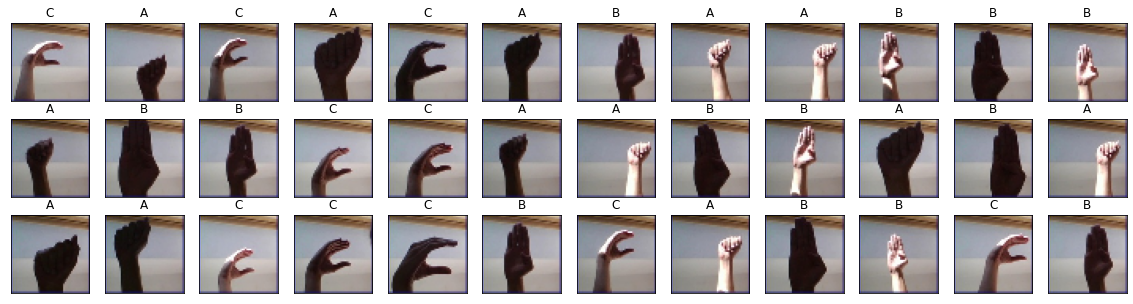

In [8]:
# Store labels of dataset that appear in dataset
labels = ['A', 'B', 'C']

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

## Examine the dataset
examining number of images of each letter can be found in the dataset.
x_train and x_test contain the images, and y_train and y_test contain their corresponding labels.
Each entry in y_train and y_test is one of 0, 1, or 2, corresponding to the letters 'A', 'B', and 'C'
Define arrays y_train and y_test to verify that both the training and test sets each have roughly equal proportions of each letter.

In [9]:
# Number of A's in the training dataset
num_A_train = sum(y_train==0)
# Number of B's in the training dataset
num_B_train = sum(y_train==1)
# Number of C's in the training dataset
num_C_train = sum(y_train==2)

# Number of A's in the test dataset
num_A_test = sum(y_test==0)
# Number of B's in the test dataset
num_B_test = sum(y_test==1)
# Number of C's in the test dataset
num_C_test = sum(y_test==2)

# Print statistics about the dataset
print("Training set:")
print("\tA: {}, B: {}, C: {}".format(num_A_train, num_B_train, num_C_train))
print("Test set:")
print("\tA: {}, B: {}, C: {}".format(num_A_test, num_B_test, num_C_test))

Training set:
	A: 540, B: 528, C: 532
Test set:
	A: 118, B: 144, C: 138


# Data Preprocessing

## One hot encoding the data
labels for each of the letters are encoded as categorical integers, where 'A', 'B' and 'C' are encoded as 0, 1, and 2
So we need to create dummy variables by one hot encoding thus resulting in formation of 2D array  from 1D array.
0 is encoded as [1, 0, 0],
1 is encoded as [0, 1, 0],
2 is encoded as [0, 0, 1].

In [10]:
from keras.utils import np_utils

# One-hot encode the training labels
y_train_OH = np_utils.to_categorical(y_train, 3)

# One-hot encode the test labels
y_test_OH = np_utils.to_categorical(y_test, 3)


## Define the model
Defining a convolutional neural network

In [22]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(50, 50, 3)))
# Add a max pooling layer
model.add(MaxPooling2D(pool_size=4))
# Add a convolutional layer
model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=4))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 5)         380       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        1890      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 408       
Total params: 2,678
Trainable params: 2,678
Non-trainable params: 0
____________________________________________________

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
hist = model.fit(x_train, y_train_OH,
                 validation_split=0.2,
                 epochs=2, 
                 batch_size=32)

Train on 1280 samples, validate on 320 samples
Epoch 1/2
1280/1280 [==============================] - 2s 2ms/step - loss: 1.0410 - accuracy: 0.5445 - val_loss: 0.9156 - val_accuracy: 0.6875
Epoch 2/2
1280/1280 [==============================] - 2s 1ms/step - loss: 0.7612 - accuracy: 0.7211 - val_loss: 0.5744 - val_accuracy: 0.7688


## Testing the model

In [25]:
# Obtain accuracy on test set
score = model.evaluate(x=x_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7699999809265137


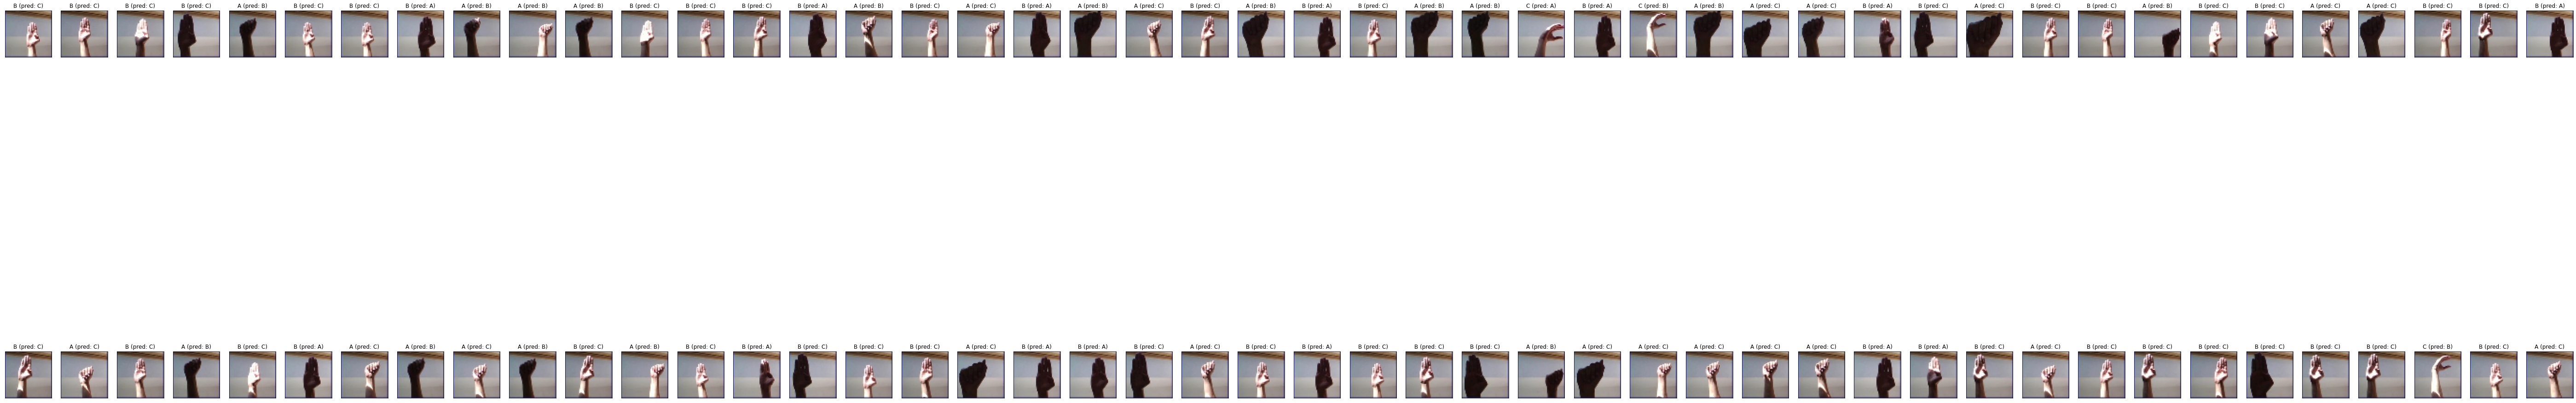

In [29]:
# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = np.argmax(y_probs, axis=1)

# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.where(y_preds!=y_test)[0]

# Print mislabeled examples
fig = plt.figure(figsize=(100,25))
for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, np.ceil(len(bad_test_idxs)/2), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))